In [ ]:
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('taxis')

In [ ]:
df.nunique()

pickup             6414
dropoff            6425
passengers            7
distance           1079
fare                220
tip                 489
tolls                16
total               898
color                 2
payment               2
pickup_zone         194
dropoff_zone        203
pickup_borough        4
dropoff_borough       5
dtype: int64

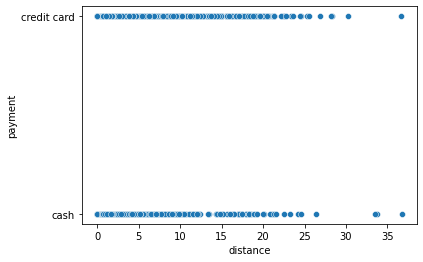

In [ ]:
sns.scatterplot(x='distance', y='payment', data=df)

In [ ]:
df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


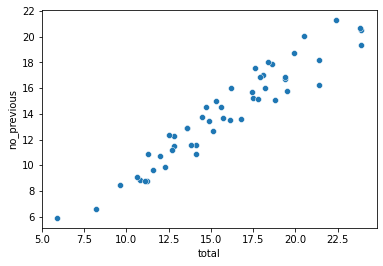

In [ ]:
sns.scatterplot(x='total', y='no_previous', data=df)

In [ ]:
Y = df['total'].values

In [ ]:
Y.shape

(51,)

In [ ]:
Y = Y[:, None]

In [ ]:
Y.shape

(51, 1)

In [ ]:
X = df['alcohol'].values

In [ ]:
X.shape

(51,)

In [ ]:
import numpy as np

In [ ]:
ones = np.ones(len(X))

In [ ]:
ones.shape

(51,)

In [ ]:
X_ = np.vstack((X, ones)).T

In [ ]:
X_.shape

(51, 2)

In [ ]:
R = np.linalg.inv(X_.T @ X_) @ X_.T @ Y

In [ ]:
R

array([[-0.20857159],
       [ 4.46368788],
       [-0.43067562]])

In [ ]:
def plotR(minX, maxX, R):
  x = np.linspace(minX, maxX, 2)
  ones = np.ones(len(x))
  x = np.vstack((x, ones)).T
  plt.plot(x[:, 0], x @ R, 'r')

In [ ]:
def plotR2(minX, maxX, R):
  x = np.linspace(minX, maxX, 100)
  ones = np.ones(len(x))
  x = np.vstack((x**2, x, ones)).T
  plt.plot(x[:, 1], x @ R, 'r')

In [ ]:
import matplotlib.pyplot as plt

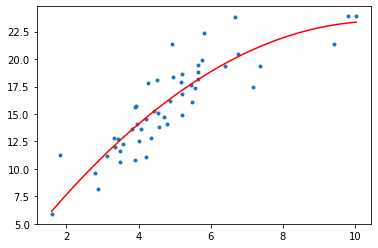

In [ ]:
plt.plot(X, Y, '.')
plotR2(X.min(), X.max(), R)

In [ ]:
X_ = np.hstack(((X**2)[:, None], X_))

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

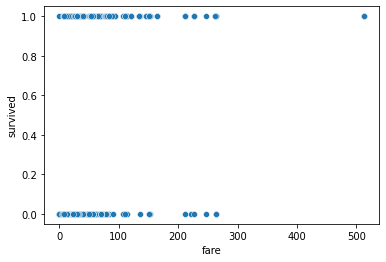

In [ ]:
sns.scatterplot(x='fare', y='survived', data=df)

In [ ]:
hours = '0.50	0.75	1.00	1.25	1.50	1.75	1.75	2.00	2.25	2.50	2.75	3.00	3.25	3.50	4.00	4.25	4.50	4.75	5.00	5.50'
passes = '0	0	0	0	0	0	1	0	1	0	1	0	1	0	1	1	1	1	1	1'

In [ ]:
hours = [float(h) for h in hours.split('\t')]
passes = [float(h) for h in passes.split('\t')]

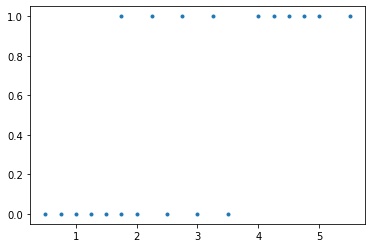

In [ ]:
plt.plot(hours, passes, '.')

In [ ]:
X = np.array(hours)
Y = np.array(passes)

In [ ]:
ones = np.ones(len(X))
X_ = np.vstack((X, ones)).T
R = np.linalg.inv(X_.T @ X_) @ X_.T @ Y
R

array([ 0.23459561, -0.15393527])

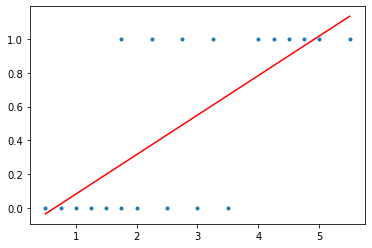

In [ ]:
plt.plot(hours, passes, '.')
plotR(X.min(), X.max(), R)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

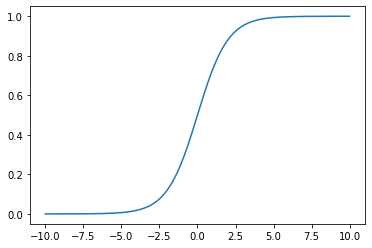

In [ ]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
plt.plot(x, y)

In [ ]:
w = np.random.randn()
b = np.random.randn()

In [ ]:
A = w*X + b

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
P = sigmoid(A)

In [ ]:
P

array([0.9456266 , 0.93196941, 0.91518954, 0.89473834, 0.87005576,
       0.84061641, 0.84061641, 0.80599466, 0.76594625, 0.72049756,
       0.67002558, 0.61530578, 0.55750452, 0.49810254, 0.38110745,
       0.32662701, 0.27645579, 0.23134343, 0.19164275, 0.12823766])

In [ ]:
def loss(P):
  L = 0
  for y, p in zip(Y, P):
    L += y * np.log(p + np.finfo(float).eps) + (1-y) * np.log(1-p + np.finfo(float).eps)
  return L

In [ ]:
loss(w, b, P)

-27.610222237963924

In [ ]:
def update(w, b, lr=0.01):
  dw = 0
  db = 0
  for x, y, p in zip(X, Y, P):
    dw += x * (p - y)
    db += (p - y)
  w -= lr * dw
  b -= lr * db
  return w, b

In [ ]:
w, b = update(w, b)

In [ ]:
w, b

(-0.842041263096913, 3.3091571069450603)

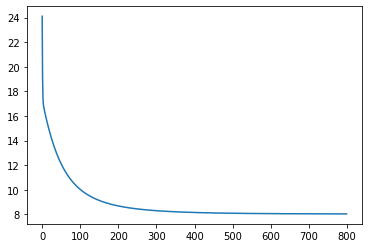

In [ ]:
w = np.random.randn()
b = np.random.randn()
l = []
for epoch in range(800):
  A = w*X + b
  P = sigmoid(A)
  l.append(-loss(w, b, P))
  #print(epoch, l[-1])
  w, b = update(w, b, lr=0.01)
plt.plot(l)

In [ ]:
w, b

(1.4273125928066548, -3.84876008118027)

In [ ]:
A = w*X + b
P = sigmoid(A)

In [ ]:
P

array([0.04168226, 0.05850947, 0.08155177, 0.11258349, 0.15345043,
       0.20571297, 0.20571297, 0.27009613, 0.34585561, 0.43033645,
       0.51907812, 0.60663222, 0.68783259, 0.75893216, 0.86535409,
       0.90179397, 0.92917905, 0.94935656, 0.964008  , 0.98203954])

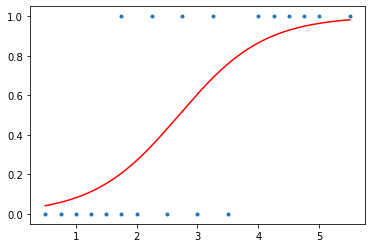

In [ ]:
plt.plot(X, Y, '.')
XX = np.linspace(X.min(), X.max(), 1000)
A = w*XX + b
P = sigmoid(A)
plt.plot(XX, P, 'r')

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df = df.dropna()

In [ ]:
X = df[['age', 'fare']].values
Y = df['survived'].values

In [ ]:
w

array([ 39.57910673, 102.50699977])

In [ ]:
def update2(w, b, lr=0.01):
  dw1 = 0
  dw2 = 0
  db = 0
  for x, y, p in zip(X, Y, P):
    dw1 += x[0] * (p - y)
    dw2 += x[1] * (p - y)
    db += (p - y)
  w[0] = w[0] - lr * dw1
  w[1] = w[1] - lr * dw2
  b -= lr * db
  return w, b

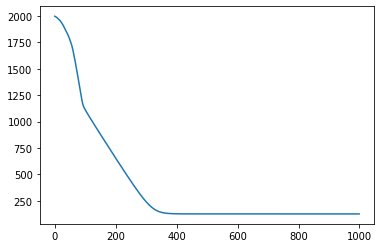

In [ ]:
w = np.random.randn(2) # age, fare
b = np.random.randn()

l = []
for epoch in range(1000):
  P = sigmoid(np.sum(X * w, axis=1)  + b)
  #print(P)
  l.append(-loss(P))
  #print(epoch, l[-1])
  w, b = update2(w, b, lr=0.000001)
plt.plot(l)

In [ ]:
w,b 

(array([0.0190981 , 0.01318271]), -1.172190060366437)

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
itrain = np.r_[:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]

In [ ]:
X = df.iloc[:, :4].values

In [ ]:
Y = df.iloc[:, -1].values

In [ ]:
Xtrain = X[itrain]
Xtest = X[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [ ]:
def NN(x):
  return Ytrain[np.sum((Xtrain - x) ** 2, axis=1).argmin()]

In [ ]:
z = []
for x in Xtest:
  z.append(NN(x))
z = np.array(z)

In [ ]:
np.sum(z == Ytest) / len(z) * 100

94.66666666666667

# K-means

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = df.iloc[:, :-1].values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
K = 3
C = X[np.random.permutation(len(X))[:K]]

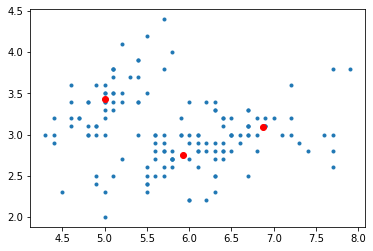

In [ ]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(C[:, 0], C[:, 1], 'or')
plt.show()

In [ ]:
D = np.zeros((K, len(X)))
for k in range(K):
  D[k] = np.sum((X - C[k]) ** 2, axis=1)

In [ ]:
idx = D.argmin(axis=0)

In [ ]:
for k in range(K):
  C[k] = X[idx == k].mean(axis=0)

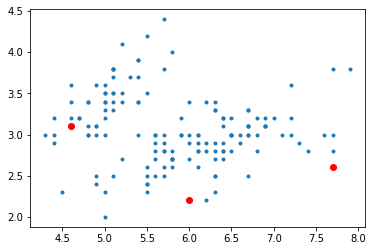

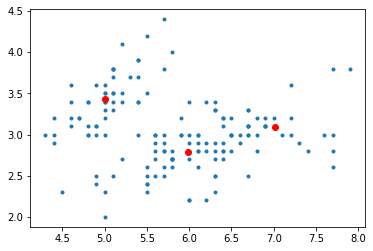

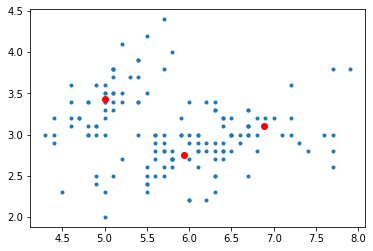

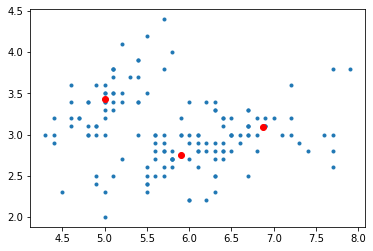

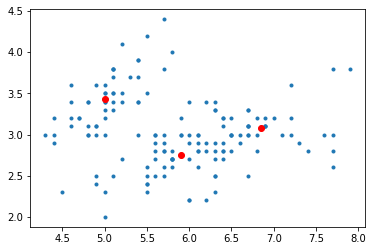

In [ ]:
K = 3
C = X[np.random.permutation(len(X))[:K]]
while True:
  # data visualization
  plt.plot(X[:, 0], X[:, 1], '.')
  plt.plot(C[:, 0], C[:, 1], 'or')
  plt.show()

  # distance
  D = np.zeros((K, len(X)))
  for k in range(K):
    D[k] = np.sum((X - C[k]) ** 2, axis=1)
  idx = D.argmin(axis=0)

  # update centroids
  Cold = C.copy() 
  for k in range(K):
    C[k] = X[idx == k].mean(axis=0)

  # check terminate condition
  if np.sum(np.abs(Cold - C)) == 0:
    break

In [ ]:
C

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
classes = list(df.iloc[:, -1].unique())

In [ ]:
Y = df.iloc[:, -1].values
for cls in classes:
  Y[Y == cls] = classes.index(cls)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [ ]:
C_actual = np.zeros((K, X.shape[1]))
for k in range(K):
  C_actual[k] = X[Y == k].mean(axis=0)

In [ ]:
C_actual

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [ ]:
C

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
to_actual = {}
for k in range(K):
  to_actual[k] = np.sum((C_actual - C[k]) ** 2, axis=1).argmin()

In [ ]:
idx_actual = idx.copy()

In [ ]:
for k, v in to_actual.items():
  i = idx == k
  idx_actual[i] = v

In [ ]:
idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
idx_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
np.sum(Y == idx_actual) / len(Y)

0.8933333333333333

# Wine

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


split train test 

*  class 1: train 30 test 29
*  class 2: train 36 test 35
*  class 3: train 24 test 24

1.   k-NN (vary K) plot accuracy
2.   k-means (vary K) accuracy (K=3)



In [ ]:
np.unique(df.iloc[:, 0].values, return_counts=True)

(array([1, 2, 3]), array([59, 71, 48]))

In [ ]:
itrain = np.r_[0:30, 59:(59+36), (59+36+35):(59+36+35+24)]

In [ ]:
all_i = list(range(len(X)))
itest = np.array(list(set(all_i) - set(itrain)))

In [ ]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [ ]:
Xtrain = X[itrain]
Xtest = X[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [ ]:
xtrain.shape

(90, 13)

In [ ]:
xtest.shape

(88, 13)

In [ ]:
z = []
for x in Xtest: 
  z.append(NN(x))

In [ ]:
np.sum(z == Ytest) / len(Ytest) * 100

71.5909090909091

In [ ]:
labels, F = np.unique([1, 2, 2, 1, 2, 3], return_counts=True)

In [ ]:
labels[F.argmax()]

2